<a href="https://colab.research.google.com/github/smanthrala/python-notebooks/blob/main/week2_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam,SGD

# The below code can be used to ignore the warnings that may occur due to deprecations
import warnings
warnings.filterwarnings("ignore")

In [6]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [14]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

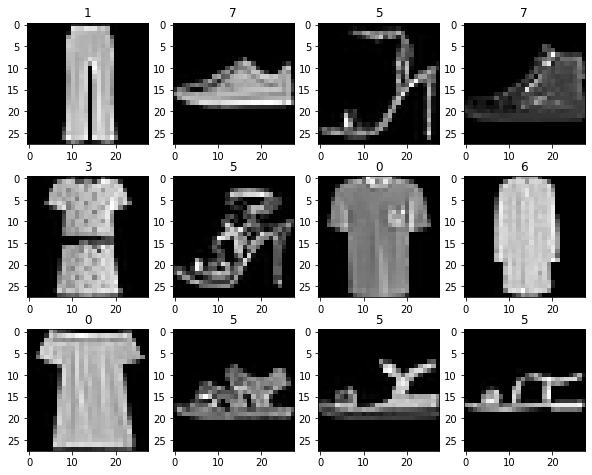

In [16]:
num_classes=10                                                                  # Number of Classes
categories=np.unique(y_train)                                                   # Obtaing the unique classes from y_train
rows = 3                                                                        # Defining number of rows=3
cols = 4                                                                        # Defining number of columns=4
fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))                       # Generating random indices from the data and plotting the images
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
        ax.imshow(X_train[random_index, :], cmap=plt.get_cmap('gray'))          # Plotting the image using cmap=gray
        ax.set_title(categories[y_train[random_index]])
plt.show()

In [17]:
# Reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [18]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [19]:
# Creating one-hot encoded representation of target labels
# We can do this by using this utility function - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
# to_categorical() function is also explained in the Neural Networks Module

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [20]:
y_train_encoded.shape

(60000, 10)

In [22]:
import random
np.random.seed(1) #for numpy
random.seed(1) 
tf.random.set_seed(1) #for tensorflow

In [26]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(100, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(10, activation='softmax'))

# Using SGD Optimizer
opt = Adam()

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 100)               1254500   
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1,256,150
Trainable params: 1,256,150
Non-trainable params: 0
____________________________________________

In [27]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.3866 - accuracy: 0.8629
Epoch 2/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2582 - accuracy: 0.9062
Epoch 3/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2151 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1827 - accuracy: 0.9326
Epoch 5/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1528 - accuracy: 0.9434


In [28]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

313/313 - 2s - loss: 0.2592 - accuracy: 0.9130 - 2s/epoch - 6ms/step


In [29]:
accuracy

[0.2592177391052246, 0.9129999876022339]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/new_preprocessed_data_2.csv")
data.head()

,loan_status,Principal,age,education_Bechalor,education_High School or Below,education_Master or Above,education_college,Gender_female,Gender_male,terms_7,terms_15,terms_30
0,0,1000,45,0,1,0,0,0,1,0,0,1
1,0,1000,50,1,0,0,0,1,0,0,0,1
2,0,1000,33,1,0,0,0,1,0,0,0,1
3,0,1000,27,0,0,0,1,0,1,0,1,0
4,0,1000,28,0,0,0,1,1,0,0,0,1


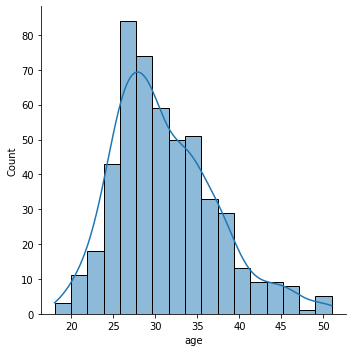

In [ ]:
#Plotting the Distribution plot 

sns.displot(data=data, x='age', kde=True)

In [ ]:
data.shape

(500, 12)

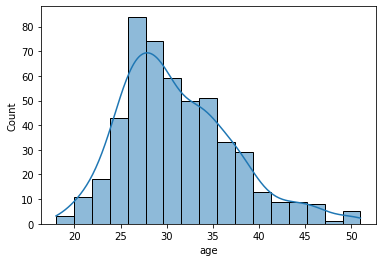

In [ ]:
sns.histplot(data['age'], kde=True)

In [ ]:
X=data.drop("loan_status", axis=1)
Y=data["loan_status"]

In [ ]:
import sklearn     
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [ ]:
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.layers import Dropout,Dense, Input, InputLayer, BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras import optimizers


In [ ]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape=X_train.shape[1]))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax')) ### For multiclass classification Softmax is used 
#optimizer = optimizer(learning_rate=learn_rate)
adam = optimizers.Adam(lr=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,947
Trainable params: 2,947
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(X_train, y_train,  epochs=20, verbose=2)

Epoch 1/20
13/13 - 1s - loss: 99.7718 - accuracy: 0.3100 - 1s/epoch - 95ms/step
Epoch 2/20
13/13 - 0s - loss: 59.8478 - accuracy: 0.4800 - 41ms/epoch - 3ms/step
Epoch 3/20
13/13 - 0s - loss: 50.3111 - accuracy: 0.4375 - 42ms/epoch - 3ms/step
Epoch 4/20
13/13 - 0s - loss: 38.7636 - accuracy: 0.4450 - 100ms/epoch - 8ms/step
Epoch 5/20
13/13 - 0s - loss: 35.9392 - accuracy: 0.4300 - 89ms/epoch - 7ms/step
Epoch 6/20
13/13 - 0s - loss: 27.6074 - accuracy: 0.4425 - 91ms/epoch - 7ms/step
Epoch 7/20
13/13 - 0s - loss: 20.7736 - accuracy: 0.4700 - 104ms/epoch - 8ms/step
Epoch 8/20
13/13 - 0s - loss: 14.2234 - accuracy: 0.4525 - 157ms/epoch - 12ms/step
Epoch 9/20
13/13 - 0s - loss: 9.7756 - accuracy: 0.4650 - 105ms/epoch - 8ms/step
Epoch 10/20
13/13 - 0s - loss: 7.1918 - accuracy: 0.4375 - 113ms/epoch - 9ms/step
Epoch 11/20
13/13 - 0s - loss: 4.1318 - accuracy: 0.5050 - 129ms/epoch - 10ms/step
Epoch 12/20
13/13 - 0s - loss: 1.8748 - accuracy: 0.5000 - 111ms/epoch - 9ms/step
Epoch 13/20
13/13 - 0

In [ ]:
model2 = tf.keras.Sequential()
model2.add(InputLayer(input_shape=X_train.shape[1]))
model2.add(Dense(256, activation = 'relu'))
model2.add(Dense(124, activation = 'relu'))
model2.add(BatchNormalization())
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(3, activation='softmax')) ### For multiclass classification Softmax is used 
#optimizer = optimizer(learning_rate=learn_rate)
adam = optimizers.RMSprop(lr=1e-3)
model2.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 256)               3072      
                                                                 
 dense_39 (Dense)            (None, 124)               31868     
                                                                 
 batch_normalization_5 (Batc  (None, 124)              496       
 hNormalization)                                                 
                                                                 
 dense_40 (Dense)            (None, 64)                8000      
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 3)                 99        
                                                      

In [ ]:
history2=model2.fit(X_train, y_train,  epochs=50, verbose=2)

Epoch 1/50
13/13 - 1s - loss: 0.9507 - accuracy: 0.6225 - 1s/epoch - 81ms/step
Epoch 2/50
13/13 - 0s - loss: 0.9419 - accuracy: 0.6225 - 46ms/epoch - 4ms/step
Epoch 3/50
13/13 - 0s - loss: 0.9220 - accuracy: 0.6200 - 38ms/epoch - 3ms/step
Epoch 4/50
13/13 - 0s - loss: 0.9317 - accuracy: 0.6225 - 43ms/epoch - 3ms/step
Epoch 5/50
13/13 - 0s - loss: 0.9316 - accuracy: 0.6225 - 34ms/epoch - 3ms/step
Epoch 6/50
13/13 - 0s - loss: 0.9376 - accuracy: 0.6225 - 32ms/epoch - 2ms/step
Epoch 7/50
13/13 - 0s - loss: 0.9414 - accuracy: 0.6225 - 35ms/epoch - 3ms/step
Epoch 8/50
13/13 - 0s - loss: 0.9375 - accuracy: 0.6225 - 44ms/epoch - 3ms/step
Epoch 9/50
13/13 - 0s - loss: 0.9425 - accuracy: 0.6225 - 35ms/epoch - 3ms/step
Epoch 10/50
13/13 - 0s - loss: 0.9282 - accuracy: 0.6225 - 39ms/epoch - 3ms/step
Epoch 11/50
13/13 - 0s - loss: 0.9395 - accuracy: 0.6225 - 35ms/epoch - 3ms/step
Epoch 12/50
13/13 - 0s - loss: 0.9343 - accuracy: 0.6225 - 35ms/epoch - 3ms/step
Epoch 13/50
13/13 - 0s - loss: 0.9264 

In [ ]:
# predicting the model on test data
y_pred2=model2.predict(X_test)

In [ ]:
y_pred2[0]

array([0.9783295 , 0.0055792 , 0.01609133], dtype=float32)

In [ ]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final=[]
for i in y_pred2:
  y_pred_final.append(np.argmax(i))

In [ ]:
y_pred_final[0]

0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68        51
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        26

    accuracy                           0.51       100
   macro avg       0.17      0.33      0.23       100
weighted avg       0.26      0.51      0.34       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model3 = tf.keras.Sequential()
model3.add(InputLayer(input_shape=X_train.shape[1]))
model3.add(Dense(128, activation = 'relu'))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dropout(0.3)) 
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(32, activation = 'relu'))
model3.add(Dense(3, activation='softmax')) ### For multiclass classification Softmax is used 
#optimizer = optimizer(learning_rate=learn_rate)
adam = optimizers.Adam(lr=1e-3)
model3.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               1536      
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 64)                4160      
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 3)                 99        
                                                                 
Total params: 16,131
Trainable params: 16,131
Non-trai

In [ ]:
history3=model3.fit(X_train, y_train,  epochs=100, verbose=2)

Epoch 1/100
13/13 - 1s - loss: 16.0457 - accuracy: 0.4600 - 1s/epoch - 83ms/step
Epoch 2/100
13/13 - 0s - loss: 6.3189 - accuracy: 0.4450 - 50ms/epoch - 4ms/step
Epoch 3/100
13/13 - 0s - loss: 4.0574 - accuracy: 0.4525 - 58ms/epoch - 4ms/step
Epoch 4/100
13/13 - 0s - loss: 2.9880 - accuracy: 0.4575 - 105ms/epoch - 8ms/step
Epoch 5/100
13/13 - 0s - loss: 2.1944 - accuracy: 0.4575 - 99ms/epoch - 8ms/step
Epoch 6/100
13/13 - 0s - loss: 1.8904 - accuracy: 0.4800 - 63ms/epoch - 5ms/step
Epoch 7/100
13/13 - 0s - loss: 1.6221 - accuracy: 0.4750 - 53ms/epoch - 4ms/step
Epoch 8/100
13/13 - 0s - loss: 1.2586 - accuracy: 0.5000 - 63ms/epoch - 5ms/step
Epoch 9/100
13/13 - 0s - loss: 1.1315 - accuracy: 0.5575 - 50ms/epoch - 4ms/step
Epoch 10/100
13/13 - 0s - loss: 1.0888 - accuracy: 0.5650 - 56ms/epoch - 4ms/step
Epoch 11/100
13/13 - 0s - loss: 1.1044 - accuracy: 0.5425 - 38ms/epoch - 3ms/step
Epoch 12/100
13/13 - 0s - loss: 1.0518 - accuracy: 0.5500 - 44ms/epoch - 3ms/step
Epoch 13/100
13/13 - 0s 

In [ ]:
y_pred3=model3.predict(X_test)
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final3=[]
for i in y_pred3:
  y_pred_final3.append(np.argmax(i))

print(classification_report(y_test,y_pred_final3))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68        51
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        26

    accuracy                           0.51       100
   macro avg       0.17      0.33      0.23       100
weighted avg       0.26      0.51      0.34       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Defining the model

model_1 = tf.keras.Sequential()

# Adding the first (input) layer
model_1.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(11,)))

# Adding second layer 
model_1.add(Dense(124, activation='relu',kernel_initializer='he_uniform'))

# Adding the BatchNormalization
model_1.add(BatchNormalization())

# Adding the third layer 
model_1.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))

#Adding fourth layer
model_1.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

# Adding the output layer
model_1.add(Dense(3, activation='softmax'))

# Defining the Optimizer
RMSprop = optimizers.RMSprop(lr=1e-3)

# Compiling the model
model_1.compile(loss=losses.categorical_crossentropy, optimizer=RMSprop, metrics=['accuracy'])

# Fitting the model
history_1=model_1.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=128, verbose=2)

# Predicting on test 

y_pred_1=model_1.predict(X_test)

# Applying argmax

y_pred_final_1=[]
for i in y_pred_1:
  y_pred_final_1.append(np.argmax(i))

# Plotting classification report 

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final_1))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/50
3/3 - 2s - loss: 1.0440 - accuracy: 0.4875 - val_loss: 49.6519 - val_accuracy: 0.6125 - 2s/epoch - 619ms/step
Epoch 2/50
3/3 - 0s - loss: 0.9448 - accuracy: 0.6250 - val_loss: 22.5727 - val_accuracy: 0.6125 - 37ms/epoch - 12ms/step
Epoch 3/50
3/3 - 0s - loss: 0.9509 - accuracy: 0.6250 - val_loss: 24.0423 - val_accuracy: 0.6125 - 38ms/epoch - 13ms/step
Epoch 4/50
3/3 - 0s - loss: 0.9280 - accuracy: 0.6250 - val_loss: 21.1017 - val_accuracy: 0.6125 - 40ms/epoch - 13ms/step
Epoch 5/50
3/3 - 0s - loss: 0.9331 - accuracy: 0.6250 - val_loss: 17.1519 - val_accuracy: 0.6125 - 37ms/epoch - 12ms/step
Epoch 6/50
3/3 - 0s - loss: 0.9177 - accuracy: 0.6250 - val_loss: 15.4588 - val_accuracy: 0.6125 - 41ms/epoch - 14ms/step
Epoch 7/50
3/3 - 0s - loss: 0.9240 - accuracy: 0.6250 - val_loss: 12.1144 - val_accuracy: 0.6125 - 74ms/epoch - 25ms/step
Epoch 8/50
3/3 - 0s - loss: 0.9252 - accuracy: 0.6250 - val_loss: 14.4441 - val_accuracy: 0.6125 - 37ms/epoch - 12ms/step
Epoch 9/50
3/3 - 0s - los

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
